In [4]:
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta
from selenium.common.exceptions import NoSuchElementException

In [1]:
from selenium import webdriver

driver = webdriver.Chrome()

driver.implicitly_wait(3)

최신순
https://search.naver.com/search.naver?where=view&query=%22%EA%B5%AD%EB%A3%B0%22&sm=tab_opt&nso=so%3Add%2Cp%3Afrom20211201to20211215%2Ca%3Aall

관련도순
https://search.naver.com/search.naver?where=view&query=%22%EA%B5%AD%EB%A3%B0%22&sm=tab_opt&nso=so%3Ar%2Cp%3Afrom20211201to20211215

In [233]:
w = input("단어 입력 : ")
word = ('"' + w + '"')

start_date = str(20200101)
end_date = str(20201201)

period = "from" + start_date + "to" + end_date

URL = "https://search.naver.com/search.naver?where=view&query=" + word + "&sm=tab_opt&nso=so%3Add%2Cp%3A" + period + "%2Ca%3Aall"
URL

driver.get(URL) 



단어 입력 : 대박


In [235]:
#끝까지 스크롤 내리기
while True:
    # 현재 화면의 높이 저장
    last_height = driver.execute_script("return document.body.scrollHeight")
    # 스크롤을 끝까지 내리는 JavaScript 실행
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # 스크롤 동작 후 로딩 대기
    time.sleep(0.7)
    # 새로운 높이 계산
    new_height = driver.execute_script("return document.body.scrollHeight")
    # 더 이상 스크롤이 되지 않으면 반복 종료
    if new_height == last_height:
        break    

In [241]:
list_1 = driver.find_elements("css selector", "#main_pack > section > more-contents > div > ul > li > div > div.detail_box > div.title_area > a")
list_1
length = len(list_1)

print("Count done.")
print(len(list_1), "개")

Count done.
150 개


---

# 연도별 탐색

In [7]:
w = input("단어 입력 : ")
word = ('"' + w + '"')
start = 20230101
end = 20231231

while True:
    start_date = str(start)
    end_date = str(end)

    period = "from" + start_date + "to" + end_date

    URL = "https://search.naver.com/search.naver?where=view&query=" + word + "&sm=tab_opt&nso=so%3Add%2Cp%3A" + period + "%2Ca%3Aall"
    driver.get(URL)

    # 끝까지 스크롤 내리기
    while True:
        last_height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break

    list_1 = driver.find_elements("css selector", "#main_pack > section > more-contents > div > ul > li > div > div.detail_box > div.title_area > a")
    length = len(list_1)
    
    
    when = str(start)[:4]
    print(f"{when}년 done. {length}개")

    # 조건 확인 및 종료
    if length < 100:
        break

    # start와 end 10000씩 줄이기
    start -= 10000
    end -= 10000

print("Searching finished.")

단어 입력 : 스불재
2023년 done. 150개
2022년 done. 150개
2021년 done. 150개
2020년 done. 150개
2019년 done. 122개
2018년 done. 11개
Searching finished.


In [9]:
dataframes = {}

___
# 월별 + 빈도수 리스트화

In [10]:
w = input("단어 입력 : ")
word = '"' + w + '"'

end = datetime(2020, 12, 31)
start = end.replace(day=1) - timedelta(days=1)
if end.day < start.day:
    start_ago = start.replace(day=end.day)

period_list = []
frequency_list = []

while True:
    start_date = str(start.strftime('%Y%m%d'))
    end_date = str(end.strftime('%Y%m%d'))
    year = str(start_date)[:4]
    month = str(start_date)[4:6]
    
    period = "from" + start_date + "to" + end_date

    URL = "https://search.naver.com/search.naver?where=view&query=" + word + "&sm=tab_opt&nso=so%3Add%2Cp%3A" + period + "%2Ca%3Aall"
    driver.get(URL)

    # 끝까지 스크롤 내리기
    while True:
        last_height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.9)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break

    list_1 = driver.find_elements("css selector", "#main_pack > section > more-contents > div > ul > li > div > div.detail_box > div.title_area > a")
    length = len(list_1)

    # 프린트용 날짜 계산
    year_print = str(end_date)[:4]
    month_print = str(end_date)[4:6]    
    
    # 경과 출력
    print(f"{year_print}년 {month_print}월 : {length}개")
    
    # 월별 빈도수 리스트 저장
    period_list.append(f"{year_print}/{month_print}")
    frequency_list.append(length)

    # 조건 확인 및 break
    if length < 2 :
        break

    # 한달씩 줄이기
    end = end.replace(day=1) - timedelta(days=1)
    if end.day < end.day:
        end_ago = end.replace(day=end.day)
    start = end.replace(day=1) - timedelta(days=1)
    if end.day < start.day:
        start_ago = start.replace(day=end.day)

print("Searching finished.")

# '연/월('+ w + ')'

df = pd.DataFrame({'연/월' : period_list, 
                   '빈도 수': frequency_list
                  })
df = df.sort_values(by = ['연/월'], ascending = True)

dataframes[input("딕셔너리에 저장할 Key(단어) 입력 : ")] = df

단어 입력 : 스불재
2020년 12월 : 127개
2020년 11월 : 103개
2020년 10월 : 87개
2020년 09월 : 91개
2020년 08월 : 88개
2020년 07월 : 84개
2020년 06월 : 75개
2020년 05월 : 87개
2020년 04월 : 70개
2020년 03월 : 83개
2020년 02월 : 64개
2020년 01월 : 58개
2019년 12월 : 51개
2019년 11월 : 31개
2019년 10월 : 30개
2019년 09월 : 29개
2019년 08월 : 22개
2019년 07월 : 23개
2019년 06월 : 11개
2019년 05월 : 11개
2019년 04월 : 11개
2019년 03월 : 10개
2019년 02월 : 10개
2019년 01월 : 4개
2018년 12월 : 2개
2018년 11월 : 4개
2018년 10월 : 0개
Searching finished.
딕셔너리에 저장할 Key(단어) 입력 : 스불재


In [11]:
dataframes["스불재"].head(30)

,연/월,빈도 수
26,2018/10,0
25,2018/11,4
24,2018/12,2
23,2019/01,4
22,2019/02,10
21,2019/03,10
20,2019/04,11
19,2019/05,11
18,2019/06,11
17,2019/07,23


# ==

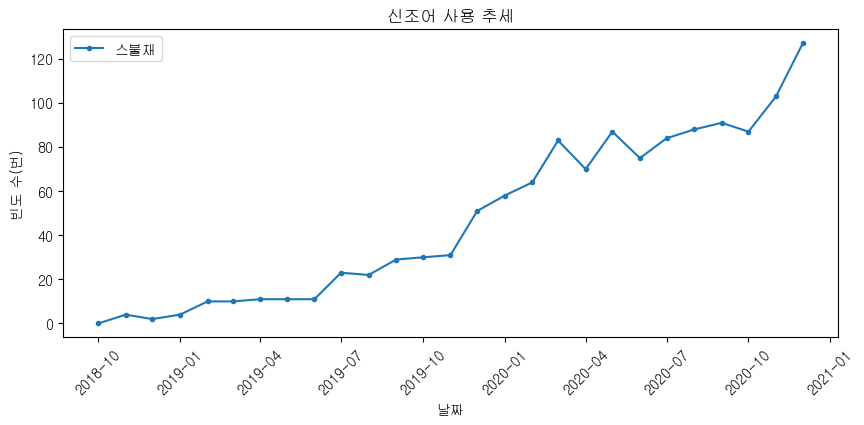

In [12]:
# '연/월' 열을 기준으로 정렬
for label, selected_df in dataframes.items():
    selected_df['연/월'] = pd.to_datetime(selected_df['연/월'], format='%Y/%m')  # 날짜 형식으로 변환
    selected_df.sort_values(by='연/월', inplace=True)  # '연/월' 열을 기준으로 정렬

# 한글 폰트 사용
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


plt.figure(figsize=(10, 4))

for label, selected_df in dataframes.items():
    plt.plot(selected_df['연/월'], selected_df['빈도 수'], marker='o', markersize=3, label=label)  # 꺾은선 그래프 그리기

plt.xticks(rotation=45)  # x축 눈금 라벨 45도 회전
plt.xlabel('날짜')  # x축 라벨 설정
plt.ylabel('빈도 수(번)')  # y축 라벨 설정
plt.title('신조어 사용 추세')  # 그래프 제목 설정
plt.legend()  # 범례 표시
# plt.tight_layout()  # 레이아웃 조절

plt.show()  # 그래프 출력

단어 입력 : 스불재


Text(0.5, 1.0, 'Frequency per month')

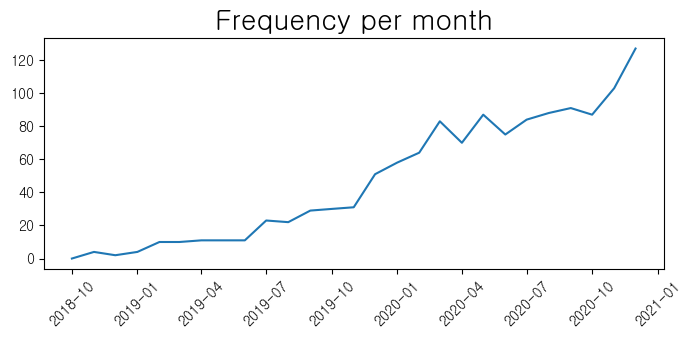

In [13]:
what = dataframes[input("단어 입력 : ")]

fig = plt.figure(figsize=(8,3)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.plot(what['연/월'],what['빈도 수']) ## 선그래프 생성
plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전
plt.title('Frequency per month',fontsize=20) ## 타이틀 설정plt.show()

In [2]:
dateframes

NameError: name 'dateframes' is not defined

---
# 제목/내용/게시자/게시일 크롤링 & csv

In [5]:
dataframes_test = []
dataframes_contents_test = []

---

In [6]:
w = input("단어 입력 : ")
word = '"' + w + '"'

end = datetime(2018, 12, 31)
start = end.replace(day=1) - timedelta(days=1)
if end.day < start.day:
    start_ago = start.replace(day=end.day)

period_list = []
frequency_list = []

title_list = []
content_list = []
writer_list = []
date_list = []
null_element = 0

while True:
    start_date = str(start.strftime('%Y%m%d'))
    end_date = str(end.strftime('%Y%m%d'))
    year = str(start_date)[:4]
    month = str(start_date)[4:6]
    
    period = "from" + start_date + "to" + end_date

    URL = "https://search.naver.com/search.naver?where=view&query=" + word + "&sm=tab_opt&nso=so%3Add%2Cp%3A" + period + "%2Ca%3Aall"
    driver.get(URL)

    # 끝까지 스크롤 내리기
    while True:
        last_height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(0.8)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break



    list_1 = driver.find_elements("css selector", "#main_pack > section > more-contents > div > ul > li > div > div.detail_box > div.title_area > a")
    length = len(list_1)

    # 프린트용 날짜 계산
    year_print = str(end_date)[:4]
    month_print = str(end_date)[4:6]    
    
    # 경과 출력
    print(f"{year_print}년 {month_print}월 : {length}개")
    
    # 월별 빈도수 리스트 저장
    period_list.append(f"{year_print}/{month_print}")
    frequency_list.append(length)
    
    
    
    # 제목, 내용, 저자, 날짜 리스트에 담기
    elements = driver.find_elements("css selector", '#main_pack > section > more-contents > div > ul > li > div')

    for i, element in enumerate(elements, start=1):
        try:
            title = element.find_element("css selector", 'div.detail_box > div.title_area > a').text
            content = element.find_element("css selector", 'div > div.detail_box > div.dsc_area > a').text
            writer = element.find_element("css selector", 'div > div.user_box > div.user_box_inner > div > a').text
            date = element.find_element("css selector", 'div > div.user_box > div.user_box_inner > div > span').text

            #print("")
            #print(title)
            #print(content)
            #print(writer)
            #print(date)
            #print("----")

            title_list.append(title)
            content_list.append(content)
            writer_list.append(writer)
            date_list.append(date)

        except NoSuchElementException:
            #print("")
            #print(f"Null({i})")
            null_element += 1



    

    # 조건 확인 및 break
    if length < 2 :
        break

    # 한달씩 줄이기
    end = end.replace(day=1) - timedelta(days=1)
    if end.day < end.day:
        end_ago = end.replace(day=end.day)
    start = end.replace(day=1) - timedelta(days=1)
    if end.day < start.day:
        start_ago = start.replace(day=end.day)

print("----")
print(null_element)
print("Searching finished.")



df = pd.DataFrame({'연/월' : period_list, 
                   '빈도 수': frequency_list
                  })
df = df.sort_values(by = ['연/월'], ascending = True)
dataframes_test[input("딕셔너리에 저장할 Key(단어) 입력 : ")] = df

df_contents = pd.DataFrame({'제목('+ w + ")": title_list, 
                    '내용': content_list, 
                    '게시자': writer_list, 
                    '게시날짜': date_list
                    })
dataframes_contents_test[input("2딕셔너리에 저장할 Key(단어) 입력 : ")] = df_contents

단어 입력 : 스불재
2018년 12월 : 2개
2018년 11월 : 4개
2018년 10월 : 0개
----
0
Searching finished.
딕셔너리에 저장할 Key(단어) 입력 : 스불재


TypeError: list indices must be integers or slices, not str

In [39]:
dataframes_test["스불재"]

,연/월,빈도 수
2,2018/10,0
1,2018/11,4
0,2018/12,2


In [40]:
dataframes_contents_test["스불재"]

,제목(스불재),내용,게시자,게시날짜
0,마법 보조소녀,아..... 다시는 스불재 안 하리라....................,자급자족,2018.12.08.
1,빗소리 잔향듣고 필받아서 그리는 그림,왜 스불재를....한걸까.....이게 다 강지님이 빗소리 잔향을 불러서야...(강지...,스텔라이브,2018.12.01.
2,살아있음,그림 그릴 시간이 별로 안 나요 더 그리긴 했는데 그냥 커뮤 로그나 관켸오너님 드린...,웹 페이지가 만료되었습니다.,2018.11.23.
3,시초신들의 패착,하지만 결국엔 어느모로 보나 칼리가 간다르바의 원수 중의 원수죠 ㅋㅋ 학살로 인한 ...,KUBERA [네이버 웹툰 쿠베라 팬카페],2018.11.22.
4,스스로 불러온 재앙에 짓눌려,게시판과 자유 게시판은 양식을 지우고 자유롭게 작성하셔도 됩니다. 연습중 그림이나 ...,네오아카데미,2018.11.07.
5,세상에 마지막 업뎃이 작년이라니;,데코라+평범<<을 짬뽕해서 만들었습니다 (그리고 스불재에 갇혀버림) 커뮤 진짜 즐거...,느루 :: 잠시 쉬어가는 곳.,2018.11.03.


---
### csv 저장방법 강구중...

In [41]:
dataframes_contents_test

{'스불재':                 제목(스불재)                                                 내용  \
 0               마법 보조소녀           아..... 다시는 스불재 안 하리라....................   
 1  빗소리 잔향듣고 필받아서 그리는 그림  왜 스불재를....한걸까.....이게 다 강지님이 빗소리 잔향을 불러서야...(강지...   
 2                  살아있음  그림 그릴 시간이 별로 안 나요 더 그리긴 했는데 그냥 커뮤 로그나 관켸오너님 드린...   
 3              시초신들의 패착  하지만 결국엔 어느모로 보나 칼리가 간다르바의 원수 중의 원수죠 ㅋㅋ 학살로 인한 ...   
 4       스스로 불러온 재앙에 짓눌려  게시판과 자유 게시판은 양식을 지우고 자유롭게 작성하셔도 됩니다. 연습중 그림이나 ...   
 5    세상에 마지막 업뎃이 작년이라니;  데코라+평범<<을 짬뽕해서 만들었습니다 (그리고 스불재에 갇혀버림) 커뮤 진짜 즐거...   
 
                        게시자         게시날짜  
 0                     자급자족  2018.12.08.  
 1                    스텔라이브  2018.12.01.  
 2          웹 페이지가 만료되었습니다.  2018.11.23.  
 3  KUBERA [네이버 웹툰 쿠베라 팬카페]  2018.11.22.  
 4                   네오아카데미  2018.11.07.  
 5         느루 :: 잠시 쉬어가는 곳.  2018.11.03.  }

In [42]:
dataframes_contents_test['스불재']['제목(스불재)']

0                 마법 보조소녀
1    빗소리 잔향듣고 필받아서 그리는 그림
2                    살아있음
3                시초신들의 패착
4         스스로 불러온 재앙에 짓눌려
5      세상에 마지막 업뎃이 작년이라니;
Name: 제목(스불재), dtype: object

In [49]:
df = pd.DataFrame(data['스불재'])

# CSV 파일로 저장
df.to_csv('output.csv', index=False)

In [50]:
pd.read_csv('output.csv')

,제목(스불재),내용,게시자,게시날짜
0,마법 보조소녀,아..... 다시는 스불재 안 하리라....................,자급자족,2018.12.08.
1,빗소리 잔향듣고 필받아서 그리는 그림,왜 스불재를....한걸까.....이게 다 강지님이 빗소리 잔향을 불러서야...(강지...,스텔라이브,2018.12.01.
2,살아있음,그림 그릴 시간이 별로 안 나요 더 그리긴 했는데 그냥 커뮤 로그나 관켸오너님 드린...,웹 페이지가 만료되었습니다.,2018.11.23.
3,시초신들의 패착,하지만 결국엔 어느모로 보나 칼리가 간다르바의 원수 중의 원수죠 ㅋㅋ 학살로 인한 ...,KUBERA [네이버 웹툰 쿠베라 팬카페],2018.11.22.
4,스스로 불러온 재앙에 짓눌려,게시판과 자유 게시판은 양식을 지우고 자유롭게 작성하셔도 됩니다. 연습중 그림이나 ...,네오아카데미,2018.11.07.
5,세상에 마지막 업뎃이 작년이라니;,데코라+평범<<을 짬뽕해서 만들었습니다 (그리고 스불재에 갇혀버림) 커뮤 진짜 즐거...,느루 :: 잠시 쉬어가는 곳.,2018.11.03.


# 월별 탐색 (구버전)

In [32]:
w = input("단어 입력 : ")
word = ('"' + w + '"')

end = datetime(2015, 12, 31)
start = end.replace(day=1) - timedelta(days=1)
if end.day < start.day:
    start_ago = start.replace(day=end.day)

while True:
    start_date = str(start.strftime('%Y%m%d'))
    end_date = str(end.strftime('%Y%m%d'))
    year = str(start_date)[:4]
    month = str(start_date)[2:4]

    period = "from" + start_date + "to" + end_date

    URL = "https://search.naver.com/search.naver?where=view&query=" + word + "&sm=tab_opt&nso=so%3Add%2Cp%3A" + period + "%2Ca%3Aall"
    driver.get(URL)

    # 끝까지 스크롤 내리기
    while True:
        last_height = driver.execute_script("return document.body.scrollHeight")
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break

    list_1 = driver.find_elements("css selector", "#main_pack > section > more-contents > div > ul > li > div > div.detail_box > div.title_area > a")
    length = len(list_1)
    
    
    year = end.strftime('%Y%m%d')[:6]
    print(f"{year}자료. {length}개")
    

    # 조건 확인 및 종료
    if length < 2 :
        break

    # 한달씩 줄이기
    end = end.replace(day=1) - timedelta(days=1)
    if end.day < end.day:
        end_ago = end.replace(day=end.day)
    start = end.replace(day=1) - timedelta(days=1)
    if end.day < start.day:
        start_ago = start.replace(day=end.day)

print("Searching finished.")



단어 입력 : 할많하않
201512자료. 60개
201511자료. 54개
201510자료. 32개
201509자료. 45개
201508자료. 33개
201507자료. 31개
201506자료. 13개
201505자료. 23개
201504자료. 15개
201503자료. 8개
201502자료. 11개
201501자료. 3개
201412자료. 0개
Searching finished.


---

#main_pack > section > more-contents > div > ul > li:nth-child(1) > 
#main_pack > section > more-contents > div > ul > li > 

제목
div > div.detail_box > div.title_area > a
div > div.detail_box > div.title_area > a
div > div.detail_box > div.title_area > a

내용
div > div.detail_box > div.dsc_area > a
div > div.detail_box > div.dsc_area > a

어디
div > div.user_box > div.user_box_inner > div > a
div > div.user_box > div.user_box_inner > div > a

게시날짜
div > div.user_box > div.user_box_inner > div > span
div > div.user_box > div.user_box_inner > div > span


In [208]:
title_list = []
content_list = []
writer_list = []
date_list = []

elements = driver.find_elements("css selector", '#main_pack > section > more-contents > div > ul > li > div')

for i, element in enumerate(elements, start=1):
    try:
        title = element.find_element("css selector", 'div.detail_box > div.title_area > a').text
        content = element.find_element("css selector", 'div > div.detail_box > div.dsc_area > a').text
        writer = element.find_element("css selector", 'div > div.user_box > div.user_box_inner > div > a').text
        date = element.find_element("css selector", 'div > div.user_box > div.user_box_inner > div > span').text
        
        print("")
        print(title)
        print(content)
        print(writer)
        print(date)
        print("----")
        
        title_list.append(title)
        content_list.append(content)
        writer_list.append(writer)
        date_list.append(date)

    except NoSuchElementException:
        print("")
        print(f"Null({i})")
        print("----")

[마이풀영어] 영어 신조어 알아보기
내또출: 내일 또 출근 3. 나심비 : 가심비의 변형어로 나의 심리를 만족시킴 4. 핑프: 핑거 프린세스로 뭐든 궁금한 게 있으면 손가락으로 인터넷에 검색하는 사람들 5. 멍청비용 : 나의 부주의로 인해 멍청하게 낭비한 돈 6. 갑통알: 갑자기 통장 보니 알바해야...
마이풀
2020.11.30.
----
요즘즘즘
우리할아버지 감 한박스 사갔는데 내심 걱정했는데 ㅇㅣ런 맛이면 걱정 할 필요 없어짜나!!! ㄹ울 할아부지 짱.. 히히 이렇게 내 투오프는 끝이났두나.. ㅎ 내또출.. 해보자.. 아자아자.. ✨✨ #일상 #주말 #개로나 #코로나 #목포 #서이추 #목포맛집 #소통 #이웃 #이웃환영 #블로그
혜주 쁠로그⠀
2020.11.27.
----
필사의 노력.. 신조어 테스트
내또출 - 내일 또 출근 11. 고스팅 - 갑자기 유령처럼 잠수타는 사람 12. 삼귀다 - 사귀기 전 썸같은 단계 13. 스라밸 - 스터디 + 라이프 + 밸런스 14. 구취 - 구독 취소 15. 핑프 - 핑거프린세스 (궁금하면 인터넷 검색하는 사람) 16. 좋못사 - 좋다 못해 사랑해 17. 갑통알...
무지개돌 위에서 나불나불
2020.11.26.
----
2020년 신조어 테스트!! 뭐가 이리 많아. (내가 아재라니)
(주관식) 나심비 - 삼귀다 - 최최차차 - 갑통알 - 알잘딱깐센 - 고스팅 - 와르르맨션 - 슬세권 - 내또출 - 비담 - https://blog.naver.com/jnsion/222154321020 "" 추워지면 히터를 너무 틀어서 졸리네요. 추워서 껴입으면 지하철 버스는 덥고. 뭐든 적당히가 힘든거 같아요~ 다들...
일시 정지
2020.11.25.
----
신조어 정답2 - 나심비, 삼귀다, 최최차차, 갑통알, 알잘딱깐센, 고스팅, 와르르멘션, 슬세권, , 비담
바다 가고 싶다아. 내또출 내일 또 출근 내일 또 출근해야 한다는 직장인의 애환이 담긴 말 월화수목금금금 월급은 스쳐 지나가는 것. (스치기라도 하면 다행이지) 하지말 벌어야

In [209]:
df = pd.DataFrame({'제목('+ w + ")": title_list, 
                   '내용': content_list, 
                   '게시자': writer_list, 
                   '게시날짜': date_list
                  })
df

,제목(내또출),내용,게시자,게시날짜
0,[마이풀영어] 영어 신조어 알아보기,내또출: 내일 또 출근 3. 나심비 : 가심비의 변형어로 나의 심리를 만족시킴 4....,마이풀,2020.11.30.
1,요즘즘즘,우리할아버지 감 한박스 사갔는데 내심 걱정했는데 ㅇㅣ런 맛이면 걱정 할 필요 없어짜...,혜주 쁠로그⠀,2020.11.27.
2,필사의 노력.. 신조어 테스트,내또출 - 내일 또 출근 11. 고스팅 - 갑자기 유령처럼 잠수타는 사람 12. 삼...,무지개돌 위에서 나불나불,2020.11.26.
3,2020년 신조어 테스트!! 뭐가 이리 많아. (내가 아재라니),(주관식) 나심비 - 삼귀다 - 최최차차 - 갑통알 - 알잘딱깐센 - 고스팅 - 와...,일시 정지,2020.11.25.
4,"신조어 정답2 - 나심비, 삼귀다, 최최차차, 갑통알, 알잘딱깐센, 고스팅, 와르르...",바다 가고 싶다아. 내또출 내일 또 출근 내일 또 출근해야 한다는 직장인의 애환이 ...,일시 정지,2020.11.25.
5,좋은 아침입니다,"⚘ 신조어, 내또출 내일 또 출근의 줄임말 김연숙(1958년생) -- 그날(1982...",(주)경성리츠 [365건강이올집] 건강프로젝트,2020.11.23.
6,오늘의상식 20.11.23,"⚘ 신조어, 내또출 내일 또 출근의 줄임말 김연숙(1958년생) -- 그날(1982...",노마진의 세상사는 이야기,2020.11.23.
7,2020신조어테스트 나는 인싸일까?,· 별다줄 : 별걸 다 줄이네 · 꾸안꾸 : 꾸미지 않은 듯 꾸민 · 고스팅 : 갑...,쫑이 하루,2020.11.20.
8,내또출 나심비 뜻 고스팅 간단정리,바로 내또출 뜻 내심비 고스팅에 대한 정보입니다. 이게 도무지 무슨말인지 그리고 어...,큰마음카2,2020.11.18.
9,내또출 뜻 나심비 고스팅 해석하기,내일 또 출근 이라는 뜻으로 직장인들이 한숨을 내뿜으며 내일도 또 출근이야 라 는 ...,특별분양 클라쓰,2020.11.17.


In [170]:
title_list.clear()
content_list.clear()
writer_list.clear()
date_list.clear()

In [ ]:
framewo